# Data Cleaning

First the data needs to be looked at to confirm whether it's been read correctly or not.

Missing values will be marked with `NaN` or `None`.

In [1]:
import pandas as pd
import numpy as np

# read in all our data
nfl_data = pd.read_csv("D:/input/nflplaybyplay2009to2016/NFL Play by Play 2009-2017 (v4).csv")

# set seed for reproducibility
np.random.seed(0) 

# look at the first five rows of the nfl_data file. 
# I can see a handful of missing data already!
nfl_data.head()

C:\Users\t_kag\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (25,51) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Date,GameID,Drive,qtr,down,time,TimeUnder,TimeSecs,PlayTimeDiff,SideofField,...,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
0,2009-09-10,2009091000,1,1,NaN,15:00,15,3600.0,0.0,TEN,...,NaN,0.485675,0.514325,0.546433,0.453567,0.485675,0.060758,NaN,NaN,2009
1,2009-09-10,2009091000,1,1,1.0,14:53,15,3593.0,7.0,PIT,...,1.146076,0.546433,0.453567,0.551088,0.448912,0.546433,0.004655,-0.032244,0.036899,2009
2,2009-09-10,2009091000,1,1,2.0,14:16,15,3556.0,37.0,PIT,...,NaN,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,NaN,NaN,2009
3,2009-09-10,2009091000,1,1,3.0,13:35,14,3515.0,41.0,PIT,...,-5.031425,0.510793,0.489207,0.461217,0.538783,0.510793,-0.049576,0.106663,-0.156239,2009
4,2009-09-10,2009091000,1,1,4.0,13:27,14,3507.0,8.0,PIT,...,NaN,0.461217,0.538783,0.558929,0.441071,0.461217,0.097712,NaN,NaN,2009


In [2]:
# get the number of missing data points per column
missing_values_count = nfl_data.isnull().sum()

# look at the # of missing points in the first ten columns
missing_values_count[0:10]

Date                0
GameID              0
Drive               0
qtr                 0
down            61154
time              224
TimeUnder           0
TimeSecs          224
PlayTimeDiff      444
SideofField       528
dtype: int64

In [3]:
# how many total missing values do we have?
total_cells = np.product(nfl_data.shape)
total_missing = missing_values_count.sum()

# percent of data that is missing
percent_missing = (total_missing/total_cells) * 100
print(f"{percent_missing:.2f}% of the data is missing")

24.87% of the data is missing


In [4]:
# look at the # of missing points in the first ten columns
missing_values_count[0:10]

Date                0
GameID              0
Drive               0
qtr                 0
down            61154
time              224
TimeUnder           0
TimeSecs          224
PlayTimeDiff      444
SideofField       528
dtype: int64

Missing data comes about either because it wasn't recorded or because it doesn't exist.

It is important to ask **Why is it missing? Because it is unrecorded or because it doesn't exist?**

If the question is "How high is the eldest child" to a person who has no children then it would make sense that there is no value. These might be better off as `NaN`. Other values might be better being filled in by *guessing* using an averaged value called *imputation*.

In this dataset `TimeSecs` has a lot of missing values. The documentation that comes with the data states that this column has information on the number of seconds left in the game when the play was made. The missing values were likely not recorded rather than because they don't exist. This column makes sense to *guess* rather than leave them as `NaN`.

The field `PenalizedTeam` also has a lot of missing instances which is to say the team is penalized. This column would make more sense to leave empty or add a third value `neither` to replace the `NA`s

# Dropping Missing Values

Dropping missing values can drop the whole table because each row may contain atleast 1 missing column. Similarly columns with missing values may be dropped but that removes a lot of data. 

In [5]:
# remove all the rows that contain a missing value
nfl_data.dropna()

,Date,GameID,Drive,qtr,down,time,TimeUnder,TimeSecs,PlayTimeDiff,SideofField,...,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season


In [6]:
# remove all columns with at least one missing value
columns_with_na_dropped = nfl_data.dropna(axis=1)
columns_with_na_dropped.head()

,Date,GameID,Drive,qtr,TimeUnder,ydstogo,ydsnet,PlayAttempted,Yards.Gained,sp,...,Timeout_Indicator,Timeout_Team,posteam_timeouts_pre,HomeTimeouts_Remaining_Pre,AwayTimeouts_Remaining_Pre,HomeTimeouts_Remaining_Post,AwayTimeouts_Remaining_Post,ExPoint_Prob,TwoPoint_Prob,Season
0,2009-09-10,2009091000,1,1,15,0,0,1,39,0,...,0,None,3,3,3,3,3,0.0,0.0,2009
1,2009-09-10,2009091000,1,1,15,10,5,1,5,0,...,0,None,3,3,3,3,3,0.0,0.0,2009
2,2009-09-10,2009091000,1,1,15,5,2,1,-3,0,...,0,None,3,3,3,3,3,0.0,0.0,2009
3,2009-09-10,2009091000,1,1,14,8,2,1,0,0,...,0,None,3,3,3,3,3,0.0,0.0,2009
4,2009-09-10,2009091000,1,1,14,8,2,1,0,0,...,0,None,3,3,3,3,3,0.0,0.0,2009


In [7]:
# just how much data did we lose?
print(f"Columns in original dataset: {nfl_data.shape[1]}\n")
print(f"Columns with na's dropped: {columns_with_na_dropped.shape[1]}")

Columns in original dataset: 102

Columns with na's dropped: 41


The `NaN` have been successfully dropped but so has a lot of valuable data.

# Filling in missing values automatically

The alternative to dropping is to fill in the values with an appropriate value. The `fillna()` function can be used to replace `NaN` values with another value.

In [8]:
# get a small subset of the NFL dataset
subset_nfl_data = nfl_data.loc[:, 'EPA':'Season'].head()
subset_nfl_data

,EPA,airEPA,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
0,2.014474,NaN,NaN,0.485675,0.514325,0.546433,0.453567,0.485675,0.060758,NaN,NaN,2009
1,0.077907,-1.068169,1.146076,0.546433,0.453567,0.551088,0.448912,0.546433,0.004655,-0.032244,0.036899,2009
2,-1.402760,NaN,NaN,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,NaN,NaN,2009
3,-1.712583,3.318841,-5.031425,0.510793,0.489207,0.461217,0.538783,0.510793,-0.049576,0.106663,-0.156239,2009
4,2.097796,NaN,NaN,0.461217,0.538783,0.558929,0.441071,0.461217,0.097712,NaN,NaN,2009


In [9]:
# Use fillna() to replace all NaN's with 0
subset_nfl_data.fillna(0)

,EPA,airEPA,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
0,2.014474,0.000000,0.000000,0.485675,0.514325,0.546433,0.453567,0.485675,0.060758,0.000000,0.000000,2009
1,0.077907,-1.068169,1.146076,0.546433,0.453567,0.551088,0.448912,0.546433,0.004655,-0.032244,0.036899,2009
2,-1.402760,0.000000,0.000000,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,0.000000,0.000000,2009
3,-1.712583,3.318841,-5.031425,0.510793,0.489207,0.461217,0.538783,0.510793,-0.049576,0.106663,-0.156239,2009
4,2.097796,0.000000,0.000000,0.461217,0.538783,0.558929,0.441071,0.461217,0.097712,0.000000,0.000000,2009


In [10]:
# replace all NA's the value that comes directly after it in the same column, 
# then replace all the remaining na's with 0
subset_nfl_data.fillna(method='bfill', axis=0).fillna(0)

,EPA,airEPA,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
0,2.014474,-1.068169,1.146076,0.485675,0.514325,0.546433,0.453567,0.485675,0.060758,-0.032244,0.036899,2009
1,0.077907,-1.068169,1.146076,0.546433,0.453567,0.551088,0.448912,0.546433,0.004655,-0.032244,0.036899,2009
2,-1.402760,3.318841,-5.031425,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,0.106663,-0.156239,2009
3,-1.712583,3.318841,-5.031425,0.510793,0.489207,0.461217,0.538783,0.510793,-0.049576,0.106663,-0.156239,2009
4,2.097796,0.000000,0.000000,0.461217,0.538783,0.558929,0.441071,0.461217,0.097712,0.000000,0.000000,2009


# Scaling and Normalization

The difference between scaling and normalization is:

* **Scaling** changes the *range* of the data
* **Normalizing** changes the *shape of the distribution* of the data.

## Scaling

Transform data to fit within a scale like 0-100 or 0-1.
Scaling data is for methods based on measures of how far apart datapoints are like `Support Vector Machines (SVM)` and `K-Nearest Neighbors (KNN)`. These numberic algorithms see a numerica chang of 1 being given the same importance.

In looking at the price of books, a book may be priced at 1 USDollar while another is priced at 100 JPYen. Other places this might be used is in weight and height conversions. Feet to meters or pounds to kilograms.

The data being worked on here will be made up.

In the first example the data is scaled from 0 to 8-ish to 0 to 1.

In [11]:
# for Box-Cox Transformation
from scipy import stats

# for min_max scaling
from mlxtend.preprocessing import minmax_scaling

# plotting modules
import seaborn as sns
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Scaled data')

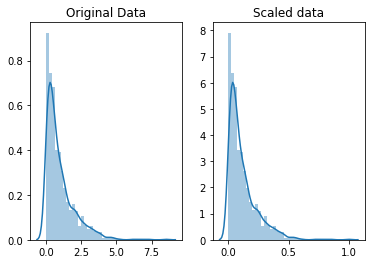

In [12]:
# generate 1000 data points randomly drawn from an exponential distribution
original_data = np.random.exponential(size=1000)

# mix-max scale the data between 0 and 1
scaled_data = minmax_scaling(original_data, columns=[0])

# plot both together to compare
fig, ax = plt.subplots(1,2)
sns.distplot(original_data, ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(scaled_data, ax=ax[1])
ax[1].set_title("Scaled data")

## Normalization

The purpose of Normalizing is to change the observations so they describe a a normal distribution (a bell curve).

Data is normalized if the machine learning or statistical techniques being used assume a normal distribution like `Linear Discrimination Analysis (LDA)` or `Gaussian naive Bayes`. (Most techniques with *Gaussian* in the name probably assumes a normal distribution.) 

The `Box-Cox Transformation` is one method for normalizing data.

Text(0.5, 1.0, 'Normalized data')

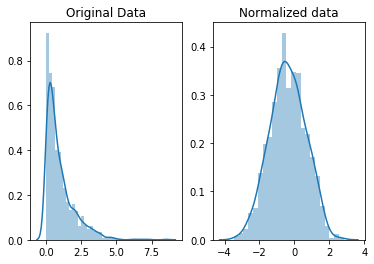

In [13]:
# normalize the exponential data with boxcox
normalized_data = stats.boxcox(original_data)

# plot both together to compare
fig, ax=plt.subplots(1,2)
sns.distplot(original_data, ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(normalized_data[0], ax=ax[1])
ax[1].set_title("Normalized data")

## Exercise

In [14]:
# read in all our data
kickstarters_2017 = pd.read_csv("D:/input/kickstarter-projects/ks-projects-201801.csv")

Text(0.5, 1.0, 'Scaled data')

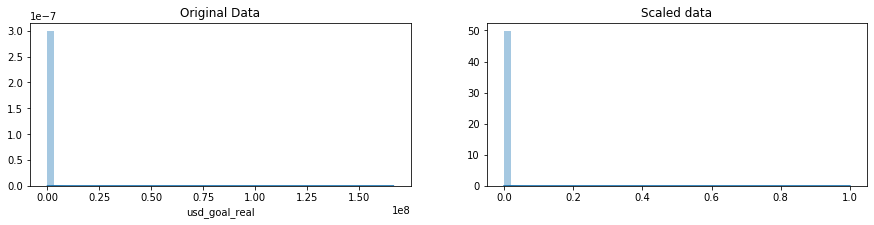

In [15]:
# select the usd_goal_real column
original_data = pd.DataFrame(kickstarters_2017.usd_goal_real)

# scale the goals from 0 to 1
scaled_data = minmax_scaling(original_data, columns=['usd_goal_real'])

# plot the original & scaled data together to compare
fig, ax=plt.subplots(1,2,figsize=(15,3))
sns.distplot(kickstarters_2017.usd_goal_real, ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(scaled_data, ax=ax[1])
ax[1].set_title("Scaled data")

In [16]:
print('Original data\nPreview:\n', original_data.head())
print('Minimum value:', float(original_data.min()),
      '\nMaximum value:', float(original_data.max()))
print('_'*30)

print('\nScaled data\nPreview:\n', scaled_data.head())
print('Minimum value:', float(scaled_data.min()),
      '\nMaximum value:', float(scaled_data.max()))

Original data
Preview:
    usd_goal_real
0        1533.95
1       30000.00
2       45000.00
3        5000.00
4       19500.00
Minimum value: 0.01 
Maximum value: 166361390.71
______________________________

Scaled data
Preview:
    usd_goal_real
0       0.000009
1       0.000180
2       0.000270
3       0.000030
4       0.000117
Minimum value: 0.0 
Maximum value: 1.0


In [17]:
# select the usd_goal_real column
original_goal_data = pd.DataFrame(kickstarters_2017.goal)

# scaled data between 0 and 1
scaled_goal_data = minmax_scaling(original_goal_data, columns=['goal'])

## Normalized Data

Text(0.5, 1.0, 'Normalized data')

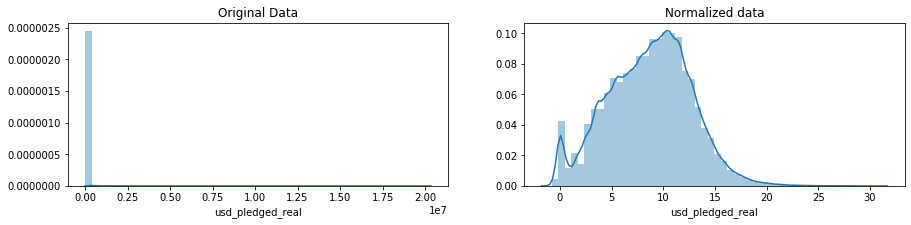

In [18]:
# get the index of all positive pledges (Box-Cox only takes positive values)
index_of_positive_pledges = kickstarters_2017.usd_pledged_real > 0

# get only positive pledges (using their indexes)
positive_pledges = kickstarters_2017.usd_pledged_real.loc[index_of_positive_pledges]

# normalize the pledges (w/ Box-Cox)
normalized_pledges = pd.Series(stats.boxcox(positive_pledges)[0], 
                               name='usd_pledged_real', index=positive_pledges.index)

# plot both together to compare
fig, ax=plt.subplots(1,2,figsize=(15,3))
sns.distplot(positive_pledges, ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(normalized_pledges, ax=ax[1])
ax[1].set_title("Normalized data")

In [19]:
print('Original data\nPreview:\n', positive_pledges.head())
print('Minimum value:', float(positive_pledges.min()),
      '\nMaximum value:', float(positive_pledges.max()))
print('_'*30)

print('\nNormalized data\nPreview:\n', normalized_pledges.head())
print('Minimum value:', float(normalized_pledges.min()),
      '\nMaximum value:', float(normalized_pledges.max()))

Original data
Preview:
 1     2421.0
2      220.0
3        1.0
4     1283.0
5    52375.0
Name: usd_pledged_real, dtype: float64
Minimum value: 0.45 
Maximum value: 20338986.27
______________________________

Normalized data
Preview:
 1    10.165142
2     6.468598
3     0.000000
4     9.129277
5    15.836853
Name: usd_pledged_real, dtype: float64
Minimum value: -0.7779954122762203 
Maximum value: 30.69054020451361


# Parsing Dates

Loading Landslide Data and printing the head of it.

In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime

# read in our data
landslides = pd.read_csv("D:/input/landslide-events/catalog.csv")

# set seed for reproducibility
np.random.seed(0)

landslides.head()

,id,date,time,continent_code,country_name,country_code,state/province,population,city/town,distance,...,geolocation,hazard_type,landslide_type,landslide_size,trigger,storm_name,injuries,fatalities,source_name,source_link
0,34,3/2/07,Night,NaN,United States,US,Virginia,16000,Cherry Hill,3.40765,...,"(38.600900000000003, -77.268199999999993)",Landslide,Landslide,Small,Rain,NaN,NaN,NaN,NBC 4 news,http://www.nbc4.com/news/11186871/detail.html
1,42,3/22/07,NaN,NaN,United States,US,Ohio,17288,New Philadelphia,3.33522,...,"(40.517499999999998, -81.430499999999995)",Landslide,Landslide,Small,Rain,NaN,NaN,NaN,Canton Rep.com,http://www.cantonrep.com/index.php?ID=345054&C...
2,56,4/6/07,NaN,NaN,United States,US,Pennsylvania,15930,Wilkinsburg,2.91977,...,"(40.4377, -79.915999999999997)",Landslide,Landslide,Small,Rain,NaN,NaN,NaN,The Pittsburgh Channel.com,https://web.archive.org/web/20080423132842/htt...
3,59,4/14/07,NaN,NaN,Canada,CA,Quebec,42786,Châteauguay,2.98682,...,"(45.322600000000001, -73.777100000000004)",Landslide,Riverbank collapse,Small,Rain,NaN,NaN,NaN,Le Soleil,http://www.hebdos.net/lsc/edition162007/articl...
4,61,4/15/07,NaN,NaN,United States,US,Kentucky,6903,Pikeville,5.66542,...,"(37.432499999999997, -82.493099999999998)",Landslide,Landslide,Small,Downpour,NaN,NaN,0.0,Matthew Crawford (KGS),NaN


In [21]:
# print the first few rows of the date column to make sure it actually 
# contains dates
print(landslides['date'].head())

0     3/2/07
1    3/22/07
2     4/6/07
3    4/14/07
4    4/15/07
Name: date, dtype: object


The column is recognized by the human eye as dates but by the machine eye it is recognized as a `dtype: object`, a *various data type* most likely *string*. 

Pandas will recognize dates by labelling them as the `datetime64` dtype. This means that the python interpreter doesn't recognize the column as dates.

In [22]:
# check the data type of our date column
landslides['date'].dtype

dtype('O')

In [23]:
# create a new column, date_parsed, with the parsed dates
landslides['date_parsed'] = pd.to_datetime(landslides['date'], format="%m/%d/%y")

# print the first few rows
landslides['date_parsed'].head()

0   2007-03-02
1   2007-03-22
2   2007-04-06
3   2007-04-14
4   2007-04-15
Name: date_parsed, dtype: datetime64[ns]

* **What if I run into an error with multiple date formats?** An error is sometimes incurred when multiple date formats are used in the same column. Pandas can try to infer what the correct date format is:

`landslides['date_parsed'] = pd.to_datetime(landslides['Date'], infer_datetime_format=True)`

* **Why don't you always use `infer_datetime_format=True`?** The two reassons for pandas not to guess the format is pandas won't always be able to guess the correct format, especially if a creative entry method was used. The second is it's slower than specifying the exact format.

## Select the day of the month

In [24]:
# get the day of the month from the date_parsed column
day_of_month_landslides = landslides['date_parsed'].dt.day
day_of_month_landslides.head()

0     2.0
1    22.0
2     6.0
3    14.0
4    15.0
Name: date_parsed, dtype: float64

Parsing this data from the original date column would run into the error: `AttributeError: Can only use .dt accessor with datetimelike values`. This is because the `dt.day` doesn't know how to deal with an `dtype:object` column.

## Plot the day of the month to check the date parsing

One of the problems with parsing dates is confusing days with months. The `to_datetime()` function  does give useful error messages, but it helps to check the days extracted from the array make sense.

Easiest way to determine if the days are correct is to create a histogram and see if the distribution makes sense. A range from 1 to 31 should be plotted with a dip in 31 because not all months have 31 days.

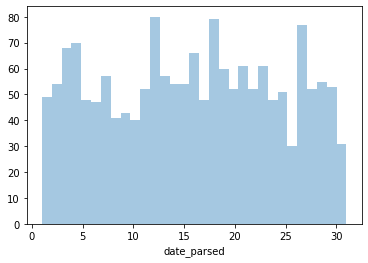

In [25]:
# remove na's
day_of_month_landslides = day_of_month_landslides.dropna()

# plot the day of the month
sns.distplot(day_of_month_landslides, kde=False, bins=31)

In [26]:
# modules we'll use
import pandas as pd
import numpy as np
import seaborn as sns
import datetime

# read in our data
earthquakes = pd.read_csv("D:/input/earthquake-database/database.csv")

# set seed for reproducibility
np.random.seed(0)

In [27]:
print(f"The Date column is of {earthquakes['Date'].dtype} type")
earthquakes.head()

The Date column is of object type


,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


In [28]:
# There is an issue in how the date is recorded.
earthquakes[3375:3383]

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
3375,02/22/1975,00:47:22,17.356,-100.482,Earthquake,40.0,NaN,NaN,5.8,MS,...,NaN,NaN,NaN,NaN,NaN,USP00009ZK,US,US,US,Reviewed
3376,02/22/1975,08:36:07,51.377,-179.419,Earthquake,48.0,NaN,NaN,6.5,MS,...,NaN,NaN,NaN,NaN,NaN,USP00009ZR,US,US,US,Reviewed
3377,02/22/1975,22:04:38,-24.886,-179.061,Earthquake,375.0,NaN,NaN,6.2,MB,...,NaN,NaN,NaN,NaN,NaN,USP0000A05,US,US,US,Reviewed
3378,1975-02-23T02:58:41.000Z,1975-02-23T02:58:41.000Z,8.017,124.075,Earthquake,623.0,NaN,NaN,5.6,MB,...,NaN,NaN,NaN,NaN,NaN,USP0000A09,US,US,US,Reviewed
3379,02/23/1975,03:53:36,-21.727,-71.356,Earthquake,33.0,NaN,NaN,5.6,MB,...,NaN,NaN,NaN,NaN,NaN,USP0000A0A,US,US,US,Reviewed
3380,02/23/1975,07:34:11,-10.879,166.667,Earthquake,33.0,NaN,NaN,5.5,MS,...,NaN,NaN,NaN,NaN,NaN,USP0000A0C,US,US,US,Reviewed
3381,02/25/1975,05:20:05,-7.388,149.798,Earthquake,33.0,NaN,NaN,5.5,MB,...,NaN,NaN,NaN,NaN,NaN,USP0000A12,US,US,US,Reviewed
3382,02/26/1975,04:48:55,85.047,97.969,Earthquake,33.0,NaN,NaN,5.6,MS,...,NaN,NaN,NaN,NaN,NaN,USP0000A1H,US,US,US,Reviewed


In [29]:
# One method to determine where all the odd records of dates are:
date_lengths = earthquakes.Date.str.len()
date_lengths.value_counts()

10    23409
24        3
Name: Date, dtype: int64

In [30]:
# Finding the entries where odd dates occur
indices = np.where([date_lengths == 24])[1]
print('Indices with corrupted data:', indices)
earthquakes.loc[indices]

Indices with corrupted data: [ 3378  7512 20650]


,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
3378,1975-02-23T02:58:41.000Z,1975-02-23T02:58:41.000Z,8.017,124.075,Earthquake,623.0,NaN,NaN,5.6,MB,...,NaN,NaN,NaN,NaN,NaN,USP0000A09,US,US,US,Reviewed
7512,1985-04-28T02:53:41.530Z,1985-04-28T02:53:41.530Z,-32.998,-71.766,Earthquake,33.0,NaN,NaN,5.6,MW,...,NaN,NaN,NaN,NaN,1.30,USP0002E81,US,US,HRV,Reviewed
20650,2011-03-13T02:23:34.520Z,2011-03-13T02:23:34.520Z,36.344,142.344,Earthquake,10.1,13.9,289.0,5.8,MWC,...,NaN,32.3,NaN,NaN,1.06,USP000HWQP,US,US,GCMT,Reviewed


In [31]:
def convert_dates(date):
    d = date.split('T')[0].split('-')
    return d[1]+'/'+d[2]+'/'+d[0]

earthquakes['Date'].iloc[indices] = earthquakes.loc[indices].Date.apply(lambda d: convert_dates(d))
# earthquakes.Date
earthquakes['date_parsed'] = pd.to_datetime(earthquakes['Date'], format="%m/%d/%Y")

C:\Users\t_kag\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [32]:
# There is an issue in how the date is recorded.
earthquakes[3375:3383]

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status,date_parsed
3375,02/22/1975,00:47:22,17.356,-100.482,Earthquake,40.0,NaN,NaN,5.8,MS,...,NaN,NaN,NaN,NaN,USP00009ZK,US,US,US,Reviewed,1975-02-22
3376,02/22/1975,08:36:07,51.377,-179.419,Earthquake,48.0,NaN,NaN,6.5,MS,...,NaN,NaN,NaN,NaN,USP00009ZR,US,US,US,Reviewed,1975-02-22
3377,02/22/1975,22:04:38,-24.886,-179.061,Earthquake,375.0,NaN,NaN,6.2,MB,...,NaN,NaN,NaN,NaN,USP0000A05,US,US,US,Reviewed,1975-02-22
3378,02/23/1975,1975-02-23T02:58:41.000Z,8.017,124.075,Earthquake,623.0,NaN,NaN,5.6,MB,...,NaN,NaN,NaN,NaN,USP0000A09,US,US,US,Reviewed,1975-02-23
3379,02/23/1975,03:53:36,-21.727,-71.356,Earthquake,33.0,NaN,NaN,5.6,MB,...,NaN,NaN,NaN,NaN,USP0000A0A,US,US,US,Reviewed,1975-02-23
3380,02/23/1975,07:34:11,-10.879,166.667,Earthquake,33.0,NaN,NaN,5.5,MS,...,NaN,NaN,NaN,NaN,USP0000A0C,US,US,US,Reviewed,1975-02-23
3381,02/25/1975,05:20:05,-7.388,149.798,Earthquake,33.0,NaN,NaN,5.5,MB,...,NaN,NaN,NaN,NaN,USP0000A12,US,US,US,Reviewed,1975-02-25
3382,02/26/1975,04:48:55,85.047,97.969,Earthquake,33.0,NaN,NaN,5.6,MS,...,NaN,NaN,NaN,NaN,USP0000A1H,US,US,US,Reviewed,1975-02-26


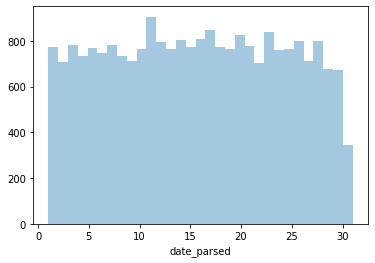

In [33]:
# try to get the day of the month from the date column
day_of_month_earthquakes = earthquakes['date_parsed'].dt.day

# plot the day of the month
sns.distplot(day_of_month_earthquakes, kde=False, bins=31)

In [34]:
# More example problems in tutorial.

# Character Encodings

In [35]:
# helpful character encoding module
import chardet

**Character encodings** map raw binary byte strings into alphanumerica text. Using the wrong encoding to decrypt text may scramble the message resulting in text called *mojibake*. 

This is an example of mojibake: æ–‡å—åŒ–ã??

Uknown characters may be reprinted as: ����������

The primary coding for text in python is UTF-8, which is the encoding that we will be concerned with.

In [36]:
# start with a string
before = "This is the euro symbol: €"

# check to see what datatype it is
print(f"{before}. It is an object type of '{type(before)}'")

# encode it to a different encoding, replacing characters that raise errors
after = before.encode("utf-8", errors="replace")

# check the type
print(f"After encoding it has an object type of '{type(after)}'")

This is the euro symbol: €. It is an object type of '<class 'str'>'
After encoding it has an object type of '<class 'bytes'>'


In [37]:
# take a look at what the bytes look like
print(f'The text converted into bytes type looks like "{after}"')

The text converted into bytes type looks like "b'This is the euro symbol: \xe2\x82\xac'"


In [38]:
# convert it back to utf-8
print(f'Converting the text back into a UTF-8 string "{after.decode("utf-8")}"')

Converting the text back into a UTF-8 string "This is the euro symbol: €"


In [39]:
# try to decode our bytes with the ascii encoding causes an error
print(after.decode("ascii"))

UnicodeDecodeError: 'ascii' codec can't decode byte 0xe2 in position 25: ordinal not in range(128)

In [40]:
# start with a string
before = "This is the euro symbol: €"

# encode it to a different encoding, replacing characters that raise errors
after = before.encode("ascii", errors = "replace")

# convert it back to utf-8
print(after.decode("ascii"))

# We've lost the original underlying byte string! It's been 
# replaced with the underlying byte string for the unknown character :(

This is the euro symbol: ?


To avoid errors and false replacements it is safer to use UTF-8 encodings.

## Reading with encoding problems

Python will read files expecting UTF-8 encoding by default, however sometimes it gets an error like:

In [41]:
# try to read in a file not in UTF-8
kickstarter_2016 = pd.read_csv("D:/input/kickstarter-projects/ks-projects-201612.csv")

UnicodeDecodeError: 'utf-8' codec can't decode byte 0x99 in position 11: invalid start byte

Importing the file creates a `UnicodeDecodeError` with UTF-8 as if the file were written in ASCII.

One way to decode the file is to try guessing and cycling through the encoders until one works. Another wayis to use the `chardet` module to try and automatically guess the correct encoding. The module is not 100% guaranteed but faster than cycling through the other method of guessing.

First the file will be open and the first thousand bytes of data are read and interpreted, which is considerably faster than reading the whole file. Another reason is to look at the 11th character where the problem appears to exist.

In [42]:
# look at the first ten thousand bytes to guess the character encoding
with open("D:/input/kickstarter-projects/ks-projects-201801.csv", 'rb') as rawdata:
    result = chardet.detect(rawdata.read(10000))

# check what the character encoding might be
print(f"The chardet module is {int(result['confidence']*100)}% confident the encoding is '{result['encoding']}'.")

The chardet module is 73% confident the encoding is 'Windows-1252'.


In [43]:
# read in the file with the encoding detected by chardet
kickstarter_2016 = pd.read_csv("D:/input/kickstarter-projects/ks-projects-201612.csv", encoding='Windows-1252')

# look at the first few lines
kickstarter_2016.head()

C:\Users\t_kag\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (13,14,15) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09 11:36:00,1000,2015-08-11 12:12:28,0,failed,0,GB,0,NaN,NaN,NaN,NaN
1,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26 00:20:50,45000,2013-01-12 00:20:50,220,failed,3,US,220,NaN,NaN,NaN,NaN
2,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16 04:24:11,5000,2012-03-17 03:24:11,1,failed,1,US,1,NaN,NaN,NaN,NaN
3,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29 01:00:00,19500,2015-07-04 08:35:03,1283,canceled,14,US,1283,NaN,NaN,NaN,NaN
4,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01 13:38:27,50000,2016-02-26 13:38:27,52375,successful,224,US,52375,NaN,NaN,NaN,NaN


## Saving your files with UTF-8 encoding

Saving by the Python standard will automatically encode into UTF-8.

In [44]:
# save our file (will be saved as UTF-8 by default!)
kickstarter_2016.to_csv("ks-projects-201801-utf8.csv")

## Exercises

In [45]:
sample_entry = b'\xa7A\xa6n'
print(sample_entry)
print('data type:', type(sample_entry))

b'\xa7A\xa6n'
data type: <class 'bytes'>


In [46]:
with open("D:/input/fatal-police-shootings-in-the-us/PoliceKillingsUS.csv", 'rb') as rawdata:
    result = chardet.detect(rawdata.read(30000))
police_killings = pd.read_csv("D:/input/fatal-police-shootings-in-the-us/PoliceKillingsUS.csv", encoding=result['encoding'])
police_killings.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [47]:
police_killings.to_csv("PoliceKillingsUS.csv")

# Inconsistent Data Entry

In [48]:
# helpful modules
import fuzzywuzzy
from fuzzywuzzy import process

# read in all our data
professors = pd.read_csv("D:/input/pakistan-intellectual-capital/pakistan_intellectual_capital.csv")
professors.head()

C:\Users\t_kag\anaconda3\lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


,Unnamed: 0,S#,Teacher Name,University Currently Teaching,Department,Province University Located,Designation,Terminal Degree,Graduated from,Country,Year,Area of Specialization/Research Interests,Other Information
0,2,3,Dr. Abdul Basit,University of Balochistan,Computer Science & IT,Balochistan,Assistant Professor,PhD,Asian Institute of Technology,Thailand,NaN,Software Engineering & DBMS,NaN
1,4,5,Dr. Waheed Noor,University of Balochistan,Computer Science & IT,Balochistan,Assistant Professor,PhD,Asian Institute of Technology,Thailand,NaN,DBMS,NaN
2,5,6,Dr. Junaid Baber,University of Balochistan,Computer Science & IT,Balochistan,Assistant Professor,PhD,Asian Institute of Technology,Thailand,NaN,"Information processing, Multimedia mining",NaN
3,6,7,Dr. Maheen Bakhtyar,University of Balochistan,Computer Science & IT,Balochistan,Assistant Professor,PhD,Asian Institute of Technology,Thailand,NaN,"NLP, Information Retrieval, Question Answering...",NaN
4,24,25,Samina Azim,Sardar Bahadur Khan Women's University,Computer Science,Balochistan,Lecturer,BS,Balochistan University of Information Technolo...,Pakistan,2005.0,VLSI Electronics DLD Database,NaN


Grabbing the `Country` column to have a look for inconsistencies and work on fixing

In [49]:
# get all the unique values in the 'Country' column
countries = professors['Country'].unique()

# sort them alphabetically and then take a closer look
countries.sort()
countries

array([' Germany', ' New Zealand', ' Sweden', ' USA', 'Australia',
       'Austria', 'Canada', 'China', 'Finland', 'France', 'Greece',
       'HongKong', 'Ireland', 'Italy', 'Japan', 'Macau', 'Malaysia',
       'Mauritius', 'Netherland', 'New Zealand', 'Norway', 'Pakistan',
       'Portugal', 'Russian Federation', 'Saudi Arabia', 'Scotland',
       'Singapore', 'South Korea', 'SouthKorea', 'Spain', 'Sweden',
       'Thailand', 'Turkey', 'UK', 'USA', 'USofA', 'Urbana', 'germany'],
      dtype=object)

Some inconsistencies can be seen like `Germany` and `germany` or ` New Zealand` and `New Zealand`.

First what needs to be done is to make everything lower case and remove beginning and end white spaces.

In [50]:
# convert to lower case
professors['Country'] = professors['Country'].str.lower()
# remove trailing white spaces
professors['Country'] = professors['Country'].str.strip()

In [51]:
# get the top 10 closest matches to "south korea"
countries = professors['Country'].unique()
matches = fuzzywuzzy.process.extract("south korea", countries, limit=10, scorer=fuzzywuzzy.fuzz.token_sort_ratio)

def replace_matches_in_column(df, column, string_to_match, min_ratio = 47):
    # get a list of unique strings
    strings = df[column].unique()
    
    # get the top 10 closest matches to our input string
    matches = fuzzywuzzy.process.extract(string_to_match, strings, 
                                         limit=10, scorer=fuzzywuzzy.fuzz.token_sort_ratio)

    # only get matches with a ratio > 90
    close_matches = [matches[0] for matches in matches if matches[1] >= min_ratio]

    # get the rows of all the close matches in our dataframe
    rows_with_matches = df[column].isin(close_matches)

    # replace all rows with close matches with the input matches 
    df.loc[rows_with_matches, column] = string_to_match
    
    # let us know the function's done
    print("All done!")
    
replace_matches_in_column(df=professors, column='Country', string_to_match="south korea")
countries = professors['Country'].unique()

All done!


array(['Asian Institute of Technology',
       'Balochistan University of Information Technology, Engineering and Management Sciences',
       'University of Balochistan',
       "Sardar Bahadur Khan Women's University",
       'SRH Hochschule Heidelberg',
       'Institute of Business Administration,Karachi', 'DUET,Karachi',
       'University of Turbat', 'University of Vienna',
       'Monash University', 'University of Stirling',
       'Chinese Academy of Sciences', 'University of Innsbruck',
       'Vienna University of Technology', 'University of Paris-Est',
       'The University of Cambridge', 'Harbin Institute of Technology',
       'University of Nice, Sophia Antipolis', 'The University of York',
       'Galilée - Université Paris 13', 'University of Bedfordshire',
       'North Dakota State University', 'Kyungpook National University',
       'The University of Manchester',
       'National University of Sciences and Technology',
       'FAST– National University of Computer